# Making a Colour Map with Compensating Tones

This notebook is Tutorial 1 of the [```CosmosCanvas```](https://github.com/mlarichardson/CosmosCanvas) package. This tutorial highlights the creation a colour map designed for plotting radio spectral index maps, where steep negative spectral slopes (n = -0.8) are assigned bright orange and everything steeper transtions to yellow, and flatter spectral slopes (n = 0.1) are assigned a dark compensating tone of orange: dark cyan. Anything flatter transitions to dark violet. We have designed this colour map to be immediately useful by using the default values for the transition from steep to flat, although these can be changed by the user.

This package uses the [```colourspace```](https://github.com/gillesferrand/colourspace) by Gilles Ferrand.

Authors: Mark L. A. Richardson, Gilles Ferrand, and Jayanne English

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
import specindex as spx
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Set min/max values
min_value = -1.5
max_value = 0.3
# Create spectral index cmap, default steep/flat values used.
cmap, RGB = spx.create_cmap_specindex(min_value,max_value,modes=['clip'],out=True)

# Save the colourmap to mpl namespace
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB['clip'],cmap), name=cmap)


loading gamut from /Users/mrichardson/Work/Research/Jayanne/FinalGitDevelopment/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'yellow-blue' for Matplotlib (1022 steps)
writing ./cmap_yellow-blue.png (32x1022)


Note, the colour map can be used for any range of values, even beyond the min_value and max_value defined here. The reason the min and max values are passed in is to that the Yellow and Cyan points remain at the physically defined Steep and Flat values. But they can be changed too. E.g.,

In [4]:
min_value_compare = -2.0
max_value_compare = 2.0

steep_compare = -0.5
flat_compare = 0.5

name_compare='yellow-blue-compare'
cmap_compare, RGB_comp = spx.create_cmap_specindex(min_value_compare,max_value_compare,modes=['clip'],out=True,
                                         steepp=steep_compare,flatp=flat_compare,name=name_compare)

matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_comp['clip'],cmap_compare), name=cmap_compare)


creating cmap 'yellow-blue-compare' for Matplotlib (1022 steps)
writing ./cmap_yellow-blue-compare.png (32x1022)


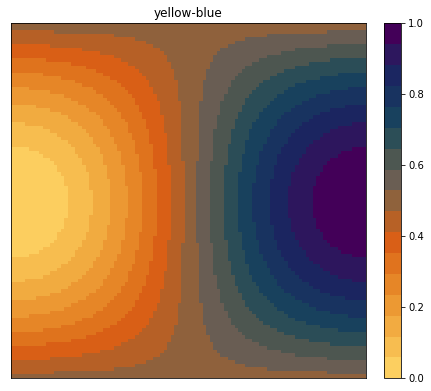

In [5]:
# Let's show the colour map, rescaled to 0:1 using the test_cmaps function.
figsize_test = (7, 7)
maps.test_cmaps(names=[cmap],figsize=figsize_test,fname="",nsteps=[17])

Let's compare that to the colour map with different steep/flat points:

An important point here is the gray value marks the midpoint between steep and shallow, which is not necessarily at the biddle of the full range colour map set by min_value and max_value.

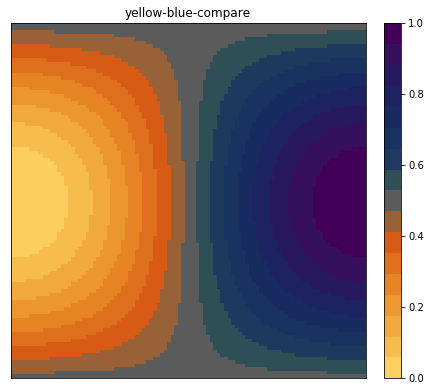

In [6]:
figsize_test = (7, 7)
maps.test_cmaps(names=[cmap_compare],figsize=figsize_test,fname="",nsteps=[17])

We can compare two colour maps side by side:

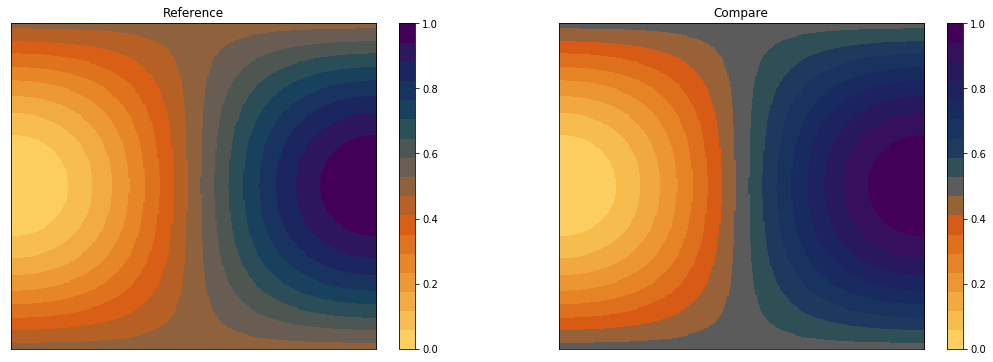

In [7]:
spx.test_cmap_showme_compare(cmap,cmap_compare,0,1,nsteps=17,t1="Reference",t2="Compare")

OK, from here on we will use the reference colour map, but we hope the process for the comparison colour map makes it clear how to set different values for the steep (orange) and flatt (dark cyan) points.

loading gamut from /Users/mrichardson/Work/Research/Jayanne/FinalGitDevelopment/colourspace/gamut/Cmax_res10_sRGB.npy


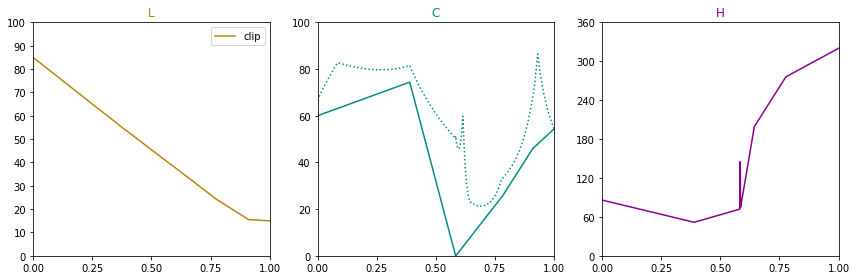

In [8]:
# Let's show the original colour map in LCH space again rescaled to 0:1 using the plot_path function.
axes = maps.plot_path(cmap, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label='clip')


Now let's show what this colour map looks like for a galaxy. The galaxy used here is NGC 3079, taken from the CHANGES B configuration data. This is featured in [```Irwin et al. (2019)```](https://ui.adsabs.harvard.edu/abs/2019AJ....158...21I/abstract). For now we use the aplpy library to plot the FITS data, although it is not optimal for making figures as desired. We will transition this to a more user friendly package soon.

In [9]:
import galfits as gal

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [10]:
# Set galaxy information
name='N3079'
title='NGC 3079'
fits_file="example_data/SpecIndex_N3079.FITS"
RA = [10., 1., 57.8]    # hh.mm.ss
DEC = [55., 40., 47.0] # deg.mm.ss
RADIUS = 0.04 # degrees
shift = [0.0, 0.2/60.] # degrees

INFO: Setting slices=[0, 0] [aplpy.core]


/anaconda2/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:
/anaconda2/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/anaconda2/lib/python2.7/site-packages/aplpy/colorbar.py:399: UserWarning: This method is not functional at this time
  warnings.warn("This method is not functional at this time")


<Figure size 612x309.6 with 0 Axes>

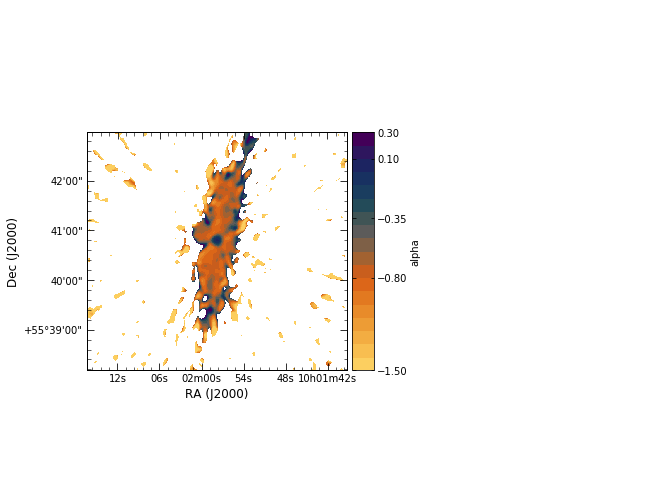

In [11]:
# Plot galaxy
ticks = [min_value,-0.8,-0.35,0.1,max_value]
nsteps=18

fig = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,min_value,max_value,cmap,ticks=ticks,nsteps=nsteps)

fig.savefig('plot.jog',dpi=250)